# Homework Set 2

## Problem 1 (40 points):

You have heard about arbitrage in previous courses, but you may not have actually looked at the different types of arbitrage opportunities mathematically and conducted tests for the existence of arbitrage. We can frame this problem as follows: assume that all securities in the economy cost one dollar, but the returns ($\mathbf{r}$) they offer investors differ in different states of the world at time $t=1$.

So our world consists of $n$ assets and $m$ states of the world. Returns can be summarized in an $m \times n$ matrix $S$ of gross returns:

$$
S = 
\begin{bmatrix}
1+r_{11} & \cdots & 1+r_{1n} \\
\vdots & \ddots & \vdots \\
1+r_{m1} & \cdots & 1+r_{mn} 
\end{bmatrix}
$$


Each row is a different state of the world and each column is a different asset. If the number of assets equals the number of states of the world the market is complete. Suppose investors in our market strictly prefer more to less and want to maximize end-of-period wealth. Further, assume that they are unrestricted (holdings do not need to sum to one and shorting is allowed). If $\mathbf{w}$ is an $n \times 1$ vector of dollar investments in the assets, arbitrage exists if an investor can:
* construct a portfolio with positive value today and no further obligation (zero cash flows in all states of the world) - this is known as first-order arbitrage, or 
* purchase a portfolio for zero cost that will pay off a positive amount in at least one state of the world while paying out nothing in all other states – this is known as second-order arbitrage.

Arbitrage in this market can be found by solving a linear program:
$$
\min_{\mathbf{w}} \mathbf{c} =\mathbf{w}'\mathbf{1}
$$
$$
\text{subject to: }
S \mathbf{w} \ge \mathbf{0}
$$

Where the cost $\mathbf{c}$ of establishing an arbitrage portfolio is minimized subject to a payoff constraint. In the constraint, the $\mathbf{0}$ is a $m \times 1$ vector of zeros and, in the objective function, $\mathbf{1}$ is a $\mathbf{n} \times \mathbf{1}$ vector of ones.


| Case | Objective | Case Constraint |
|:----: |:--------: |:--------------: |
|No Arbitrage | $\mathbf{c} = \mathbf{0}$ | $S\mathbf{w} = \mathbf{0}$ |
| 1<sup>st</sup> order arbitrage | $\mathbf{c} = -\infty$ | Feasible |
| 2<sup>nd</sup> order arbitrage | $\mathbf{c} = \mathbf{0}$ | Feasible, not all constraints binding |

1. What does the definition of a complete market hinge upon? Do you think markets are complete? Why or why not?
2. Starting simply, generate asset returns for three states of the world where each return is independent, normal, and has the same mean and volatility, 8% expected return and 20% standard deviation -- you should round/truncate your values so there are no more than 6 decimal places. Now solve the linear programming problem and check to see if arbitrage exists (chances are that it does not!) – remember to build code for all of this (including the code to test for the two types of arbitrage) and make it general since you will be using it in the next part. Can you find the state prices?
2. Now expand on your work in part 2.  Suppose you now have 100 assets and 300 states – again, in each case, iid normal (mean = 8% and standard deviation = 20%, with rounded/truncated values so there are no more than 6 decimal places). Run 1,000 independent simulations (in other words, each simulation has a different random draw -- if you use the same simulation over adn over, you get the same result!), checking for arbitrage in each simulation. What is the frequency of each type of arbitrage in this simulation (a histogram may be appropriate)?  In general, what are the implications of these results for numerical simulations?


(1) 

The concept of a complete market hinges upon the existence of tradable securities for all possible contingent claims and states of the world. In a complete market, there are assets available for trading that represent every possible future outcome or contingency. This implies that investors can hedge against any risk or uncertainty they may face. 

It is difficult for markets to be fully completed in reality. Market incompleteness is caused by a number of variables, such as transaction costs, asymmetry in the information available, limitations on short sales, and the presence of non-tradable assets. The capacity of market players to completely hedge all potential risks may be restricted by these reasons.

In [14]:
# (2)
import numpy as np
#有问题！！！！！

def test_arbitrage(m, n, mu, sigma,verbose=True):  # n is # of assets and m is # of states
    ret = np.zeros((m, n))
    for i in range(n):
        ret[:, i] = np.random.normal(mu, sigma, m).round(6)
    ret = ret + 1
    from scipy.optimize import linprog
    c = np.ones(n)
    A = -ret  
    b = np.zeros(m)  
    res = linprog(c, A_ub=A, b_ub=b, method='highs')
    flag1 = True
    flag2 = any(ret@res.x > 0) and res.fun == 0 
    if verbose:
        print("return matrix: \n", ret)
        if flag1:
            print('First Order Arbitrage exist.')
        else:
            print('First Order Arbitrage doesn\'t exist.')
        if flag2:
            print('Second Order Arbitrage exist.')
        else:
            print('Second Order Arbitrage doesn\'t exist.')
    else:
        return flag1, flag2

test_arbitrage(2, 2, 0.08, 0.2, verbose=True)


return matrix: 
 [[0.915805 0.874224]
 [1.129805 1.328327]]
First Order Arbitrage doesn't exist.
Second Order Arbitrage doesn't exist.


In [32]:
from scipy.optimize import linprog
c = [1,1]
A = -np.array([[1.5,2],[1.2,1.4]]) # obj func should be -inf
b = np.zeros(2)  
res = linprog(c, A_ub=A, b_ub=b, method='highs')
print(res.x, res.fun)
print(A @ [-1,0.9])

[0. 0.] 0.0
[-0.3  -0.06]


In [64]:
# (3)
from tqdm import tqdm
first_success = 0
second_success = 0
for i in tqdm(range(1000)):
    fg1, fg2 = test_arbitrage(300, 100, 0.08, 0.2,verbose=False)
    first_success += int(fg1)
    second_success += int(fg2)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:02<00:00,  3.31it/s]


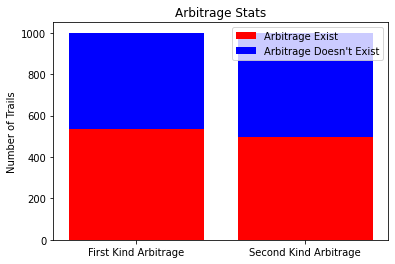

In [66]:
import matplotlib.pyplot as plt

first_res = [first_success, 1000-first_success]
second_res = [second_success, 1000-second_success]

fig, ax = plt.subplots()
# Create bars
bar1 = ax.bar(1, first_res[0], color='r', label='Arbitrage Exist')
bar2 = ax.bar(1, first_res[1], bottom=first_res[0], color='b', label='Arbitrage Doesn\'t Exist')
bar3 = ax.bar(2, second_res[0], color='r')
bar4 = ax.bar(2,second_res[1], bottom=second_res[0], color='b')

ax.set_ylabel('Number of Trails')
ax.set_title('Arbitrage Stats')
ax.set_xticks([1,2])
ax.set_xticklabels(['First Kind Arbitrage','Second Kind Arbitrage'])
ax.legend()
plt.show()

#### We can see from the numerical analysis that if the asset return follows normal distribution, then we can probably arbitrage from the market, which implies that the market is inefficient under normal assumption.

## Problem 2 (50 points):

You can obtain the constituents of the Dow Jones Industrial Average Index (DJIA) from [Wikipedia](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average).

1. Scrape (if you can) the tickers for the DJIA from the website into a csv (or Excel) file.
2. Create a `Python` function to download the past 5 months of daily prices for all of the stocks in the DJIA, reading the tickers from a file. 
3. Estimate the historical correlation and covariance matrix of the DJIA constituents' daily returns
4. Estimate historical excess return of individual stocks (assume the historical risk free rate is 1%)
5. Compute the optimal portfolio using the estimated historical excess return and covariance matrix, comment on whether the portfolio looks reasonable.
6. Compute the implied return forecast from the actual DJIA portfolio, compare this to the historical estimate, comment on which may be a better forecast for the future returns.
7. Compute the condition number of the covariance matrix, and comment on the numerical stability of the optimal portfolio. You can use the python function `numpy.linalg.norm` for matrix norm.
8. Take the daily return time series, and split them into two segments: one containing only the odd days' returns and the other containing only the even days' returns. Then estimate every DJIA stock's annualized return and annualized vol from these two data segments assuming that they are independent, and compare the results. Please comment on which of the two metrics, return or volatility, can be reliably estimated from historical data. 
9. Please repeat the analysis using weekly returns and comment on whether the results are materially different
10. Use numerical simulation to show that the optimal portfolio above does indeed have the largest Sharp ratio for the historical excess return and covariance; the best way to illustrate this is to introduce many random perturbations around the optimal portfolio. `numpy.random` is a random number generator package in Python.
11. Comment on what practical implications you might infer from the results from part 10.

**Hints:**
* as discussed in the Linear Algebra Review, returns are only meaningful in the relative sense, so please annualize all your results. You will lose credit without annualization.
* you may run into a singular matrix when inverting the covariance matrix, try to find a work around if you do, (imagine what you would do if your future boss needs some results fast, and doesn't understand why a singular matrix can't be inverted).
* for part 8, you can use array slice to split btw even and odd elements, see the following example:

```
whole = np.arange(1, 10)
print("whole = ", whole)
odd = whole[0::2]
even = whole[1::2]
print("even = ", even)
print("odd = ", odd)
```

In [1]:
# (1)
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta

df = pd.read_html("https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average")[1]
tickers = df['Symbol']
tickers.to_excel('tickers.xlsx', index=False)
index_weights = df['Index weighting']

In [2]:
# (2)
tickers = list(pd.read_excel('tickers.xlsx')['Symbol'])
end_date = datetime.today()
start_date = end_date - timedelta(days=5*30)
temp = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
    temp[ticker] = data['Adj Close']
temp

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-07,104.308548,155.635666,252.405411,177.326385,216.050003,278.692139,164.911331,55.947449,57.413708,80.308266,...,329.241760,97.601410,151.668808,222.529999,159.792633,481.288086,32.554440,246.614975,21.530407,162.865112
2023-09-08,104.594055,156.280914,257.406097,177.945557,211.270004,279.533844,165.475418,55.829224,57.413708,81.314987,...,333.592896,97.342278,151.017059,224.759995,159.016907,479.135437,32.207806,246.764648,21.481562,163.164001
2023-09-11,106.218491,156.677994,259.678223,179.124008,211.009995,279.306091,162.061203,55.996704,57.955067,82.251930,...,337.255493,96.465233,152.814301,225.309998,160.250137,477.750183,32.679607,246.694794,20.934509,163.731888
2023-09-12,105.499809,157.343109,258.279236,176.068039,210.649994,279.068420,165.079559,55.553379,57.384174,83.408165,...,331.097961,95.976883,150.128326,221.660004,161.881180,478.268402,32.775898,246.774628,21.217804,163.911224
2023-09-13,99.484467,157.978439,255.223267,173.980789,208.399994,273.235718,164.475891,55.445011,57.521976,83.208817,...,335.379303,95.807442,151.175064,218.800003,162.239212,478.208618,32.602581,247.303497,21.393642,163.951080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-29,96.379997,200.860001,313.450012,191.729996,205.190002,303.250000,149.080002,52.290001,59.730000,97.489998,...,409.720001,103.879997,156.160004,287.859985,211.119995,504.540009,42.049999,273.660004,22.719999,165.039993
2024-01-30,95.750000,204.149994,314.619995,188.039993,200.440002,304.760010,150.119995,52.240002,59.900002,96.940002,...,408.589996,104.180000,157.490005,287.730011,213.539993,503.609985,42.470001,277.149994,22.760000,165.589996
2024-01-31,94.349998,200.740005,314.260010,184.399994,211.039993,300.309998,147.429993,50.180000,59.490002,96.050003,...,397.579987,101.529999,157.139999,281.089996,211.360001,511.739990,42.349998,273.260010,22.570000,165.250000


In [3]:
# (3)
ret = np.log(temp) - np.log(temp.shift(1))
ret_corr = ret.corr()
print('Correlation between stocks are:\n', ret_corr)
ret_cov = ret.cov()
print('Covariance between stocks are:\n', ret_cov)

Correlation between stocks are:
            MMM       AXP      AMGN      AAPL        BA       CAT       CVX  \
MMM   1.000000  0.288130  0.289735  0.139185  0.180084  0.371185  0.134747   
AXP   0.288130  1.000000  0.257261  0.198908  0.236541  0.369909  0.263357   
AMGN  0.289735  0.257261  1.000000  0.201209 -0.110948  0.352791  0.147339   
AAPL  0.139185  0.198908  0.201209  1.000000  0.147456  0.337890 -0.042901   
BA    0.180084  0.236541 -0.110948  0.147456  1.000000  0.132917  0.037494   
CAT   0.371185  0.369909  0.352791  0.337890  0.132917  1.000000  0.394690   
CVX   0.134747  0.263357  0.147339 -0.042901  0.037494  0.394690  1.000000   
CSCO  0.153077  0.222815  0.281025  0.241420 -0.024790  0.274608  0.198842   
KO    0.299950  0.165340  0.363352  0.109930  0.013054  0.151658  0.019881   
DIS   0.290567  0.311673  0.091277  0.179421  0.031038  0.275603  0.170992   
DOW   0.428157  0.396005  0.284806  0.210758  0.160295  0.626853  0.340593   
GS    0.453359  0.489173  0.293

In [4]:
# (4)
annual_excess_return =  ret.mean(axis=0) * 252 - 0.01
annual_excess_return

MMM    -0.244325
AXP     0.687562
AMGN    0.600739
AAPL    0.105989
BA     -0.087475
CAT     0.293266
CVX    -0.207523
CSCO   -0.278791
KO      0.120994
DIS     0.459851
DOW    -0.007564
GS      0.470270
HD      0.214277
HON     0.160360
IBM     0.587711
INTC    0.268745
JNJ    -0.043665
JPM     0.506042
MCD     0.165577
MRK     0.414852
MSFT    0.539301
NKE     0.067461
PG      0.092443
CRM     0.607006
TRV     0.721105
UNH     0.134271
VZ      0.627032
V       0.278660
WBA     0.114152
WMT     0.089672
dtype: float64

In [5]:
# （5）
# By formula, we can compute the optimal portf as 
n = ret_cov.shape[0]
col_ret = np.array(annual_excess_return).reshape(-1,1)
ret_cov = np.array(ret_cov) * 252
best_portf = np.linalg.inv(ret_cov)@col_ret/(np.ones((1,n))@np.linalg.inv(ret_cov)@col_ret)
best_sharpe = col_ret.reshape(1,-1)@best_portf/np.sqrt(best_portf.reshape(1,-1)@ret_cov@best_portf)
best_sharpe

array([[9.04724697]])

#### It's impritical, since we are backtesting on the historical data, so our portfolio is the result of data leak. In reality, we can only use historical data to predict future returns, but the prediction is very liekly to be inaccurate.

In [6]:
# (6)
# Historical estimate of return
for i in range(len(index_weights)):
    string = index_weights[i][:-1]
    index_weights[i] = float(string) * 0.01
    
index_weights = np.array(index_weights)
print('Historical estimate of excess return', col_ret.squeeze())

Historical estimate of excess return [-0.2443248   0.68756243  0.60073886  0.10598895 -0.08747535  0.29326612
 -0.20752275 -0.27879083  0.12099364  0.45985081 -0.00756433  0.47027008
  0.21427741  0.16035954  0.58771059  0.2687447  -0.04366545  0.50604187
  0.16557725  0.41485239  0.5393008   0.06746073  0.09244348  0.60700566
  0.72110529  0.13427149  0.62703216  0.2786605   0.11415203  0.08967227]


In [7]:
# Implied return
from scipy.optimize import minimize

def loss_func(exp_ret):
    c = np.ones((1,n))@np.linalg.inv(ret_cov)@exp_ret
    vec = np.linalg.inv(ret_cov) @ exp_ret - c*index_weights.reshape(-1,1)
    loss = np.transpose(vec) @ vec
    return  loss[0][0]

res = minimize(loss_func, x0=np.ones((30,1))*0.1, method = 'Nelder-Mead')
print('Implied excess return from the actual DJIA portfolio, \n', res.x)
print('Mimimising error is ', res.fun)

Implied excess return from the actual DJIA portfolio, 
 [ 0.15566143  0.17185001  0.24977699  0.17876747  0.05181533  0.12813501
  0.06028145  0.11457426  0.20922902  0.0793675   0.02241425  0.02748327
  0.31788205  0.14411811  0.06836004  0.0501668   0.04125931  0.0970335
  0.09655259  0.13548236  0.0712086   0.08051278  0.12072735  0.16640526
  0.0347956  -0.06149631  0.1223108   0.04389456  0.11044569 -0.04599798]
Mimimising error is  1.8659884096879993e-07


When forecasting future market conditions, the implied return is more reasonable. The implied return forecast is based on current market conditions and is forward-looking, whereas historical estimates are backward-looking. Historical estimates are valuable for evaluating long-term performance trends, but they may miss short-term or unexpected market swings. Besides, implied return is backed by Markowitz theory, which is more reliable than barely forcast future with past information.

In [8]:
# (7)
# Compute condition number
condition_number_cov = np.linalg.cond(ret_cov)
print("Condition Number of covariance:", condition_number_cov)

Condition Number of covariance: 95.00805519096562


The covariance matrix has large conditional number, so it is sensitive to small changes of input. Therefore, the optimal portfolio is also unstable.

In [9]:
# (8)
df_odd = temp[0::2]
df_even = temp[1::2]
ret_odd = np.log(df_odd) - np.log(df_odd.shift(1))
annual_ret_odd = ret_odd.mean() * 126
annual_vol_odd = ret_odd.std() * np.sqrt(252/2)
print('Annualized return for odd days is\n', annual_ret_odd, 'Annualized vol for odd days is\n', annual_vol_odd)
ret_even = np.log(df_even) - np.log(df_even.shift(1))
annual_ret_even = ret_even.mean() * 126
annual_vol_even = ret_even.std() * np.sqrt(252/2)
print('Annualized return for even days is\n', annual_ret_even, 'Annualized vol for even days is\n', annual_vol_even)

Annualized return for odd days is
 MMM    -0.234325
AXP     0.697562
AMGN    0.610739
AAPL    0.115989
BA     -0.077475
CAT     0.303266
CVX    -0.197523
CSCO   -0.268791
KO      0.130994
DIS     0.469851
DOW     0.002436
GS      0.480270
HD      0.224277
HON     0.170360
IBM     0.597711
INTC    0.278745
JNJ    -0.033665
JPM     0.516042
MCD     0.175577
MRK     0.424852
MSFT    0.549301
NKE     0.077461
PG      0.102443
CRM     0.617006
TRV     0.731105
UNH     0.144271
VZ      0.637032
V       0.288660
WBA     0.124152
WMT     0.099672
dtype: float64 Annualized vol for odd days is
 MMM     0.298318
AXP     0.235580
AMGN    0.206459
AAPL    0.203965
BA      0.335750
CAT     0.296130
CVX     0.244901
CSCO    0.211953
KO      0.153046
DIS     0.224661
DOW     0.193408
GS      0.224982
HD      0.201987
HON     0.166086
IBM     0.211661
INTC    0.405771
JNJ     0.149112
JPM     0.146506
MCD     0.161935
MRK     0.176495
MSFT    0.179932
NKE     0.322984
PG      0.156269
CRM     0.292211


In [10]:
print((annual_ret_even - annual_ret_odd).mean())
print((annual_vol_even - annual_ret_odd).mean())

0.0016248156489918374
-0.032664597808704406


We can see that odd and even series provide similar estimates for annualized return and volatility. We can use either of them.

In [13]:
# (9)
from datetime import datetime
ret_odd_week = ret.resample('2W').sum()
ret_lag = ret[ret.index >= datetime.strptime('2023-09-10', '%Y-%m-%d')]
ret_even_week = ret_lag.resample('2W').sum()

annual_ret_odd_w = ret_odd_week.mean() * 26
annual_vol_odd_w = ret_odd_week.std() * np.sqrt(26)
print('Annualized return for odd weeks is\n', annual_ret_odd_w, 'Annualized vol for odd weeks is\n', annual_vol_odd_w)

annual_ret_even_w = ret_even_week.mean() * 26 
annual_vol_even_w = ret_even_week.std() * np.sqrt(26)
print('Annualized return for even weeks is\n', annual_ret_even_w, 'Annualized vol for even weeks is\n', annual_vol_even_w)

Annualized return for odd weeks is
 MMM    -0.205499
AXP     0.611751
AMGN    0.535608
AAPL    0.101720
BA     -0.067945
CAT     0.265960
CVX    -0.173224
CSCO   -0.235725
KO      0.114879
DIS     0.412052
DOW     0.002136
GS      0.421189
HD      0.196688
HON     0.149403
IBM     0.524183
INTC    0.244455
JNJ    -0.029524
JPM     0.452561
MCD     0.153978
MRK     0.372589
MSFT    0.481728
NKE     0.067932
PG      0.089841
CRM     0.541104
TRV     0.641168
UNH     0.126524
VZ      0.558667
V       0.253151
WBA     0.108879
WMT     0.087411
dtype: float64 Annualized vol for odd weeks is
 MMM     0.329517
AXP     0.247162
AMGN    0.132261
AAPL    0.170193
BA      0.447752
CAT     0.242196
CVX     0.204607
CSCO    0.201032
KO      0.160523
DIS     0.179278
DOW     0.153915
GS      0.218665
HD      0.233870
HON     0.145458
IBM     0.233261
INTC    0.387053
JNJ     0.136946
JPM     0.118805
MCD     0.192635
MRK     0.158453
MSFT    0.165487
NKE     0.304342
PG      0.157043
CRM     0.28931

In [12]:
print((annual_ret_even_w - annual_ret_odd_w).mean())
print((annual_vol_even_w - annual_vol_odd_w).mean())

-0.002307925732849581
0.001110642605976741


We can see that odd and even weeks provide similar estimates for annualized return and volatility. There isn't significant differences. We can use either of them.

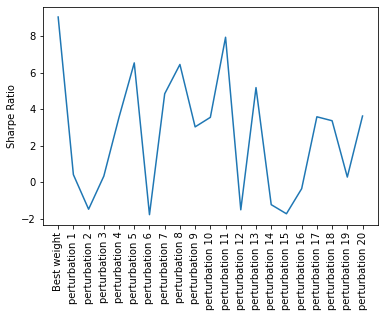

In [47]:
# (10)
import matplotlib.pyplot as plt

sharpe_ratios = [best_sharpe]
x_label = ['Best weight']
perturbations = np.random.normal(0, 1, size=(30, 20))

for i in range(20):
    hold = best_portf + perturbations[:, i]
    portfolio_excess_return = hold.T @ col_ret
    var = hold.T @ ret_cov @ hold 
    var = var[0][0]
    if var > 0:
        portfolio_volatility = np.sqrt(var)
        s_r = portfolio_excess_return / portfolio_volatility
        sharpe_ratios.append(s_r[0][0])
        x_label.append('perturbation ' + str(len(x_label)))
    
plt.plot(sharpe_ratios)
plt.ylabel('Sharpe Ratio')
plt.xticks(range(len(x_label)), x_label,rotation=90)
plt.show()

## Problem 3 (10points):

In the Linear Algebra Review, there was code for generating sample paths of geometric Brownian motion. (GBM). In that case, the various sample paths were independent of each other. For this problem, you are to produce (or modify) code to generate three **correlated** paths of geometric Brownian motion (labeling each). Choose the correlations 1.0, 0.5, -1.0; compare and contrast the results.

Text(0, 0.5, 'Price')

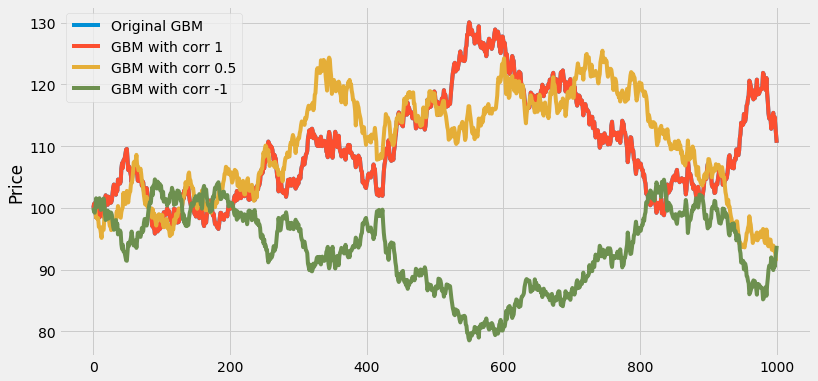

In [60]:
S0 = 100
rf = 0.05
v = 0.25
T = 1
N = 1000
dt = T / N

plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 6))
path1 = [S0]
path2 = [S0]  # path with corr = 0.5
path3 = [S0]  # path with corr = -1
for i in range(N):
    temp = np.random.randn(1)[0]
    path1.append(path1[-1] * (1 + rf * dt + np.sqrt(dt) * v * temp))
    path2.append(path2[-1] * (1 + rf * dt + np.sqrt(dt) * v * (0.5*temp+np.sqrt(1-0.25)*(np.random.randn(1)[0]))))
    path3.append(path3[-1] * (1 + rf * dt - np.sqrt(dt) * v * temp))
                 
plt.plot(path1, label='Original GBM')
plt.plot(path1, label='GBM with corr 1')                
plt.plot(path2, label='GBM with corr 0.5')    
plt.plot(path3, label='GBM with corr -1')
plt.legend()
plt.ylabel("Price")